In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('reddit.csv')

In [3]:
df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,crosspost_parent_list,poll_data,media,media_embed,secure_media,secure_media_embed,gallery_data,is_gallery,media_metadata,link_flair_css_class
0,0,[],False,IllustriousNovel7841,#f7accf,millennial,[],65c72e52-ea27-11e9-a5e5-0e427099dabc,Millennial,light,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,IllustriousNovel7841,#f7accf,millennial,[],65c72e52-ea27-11e9-a5e5-0e427099dabc,Millennial,light,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,RedPillPopper888,NaN,NaN,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Fwindowserver,NaN,NaN,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Ok_Conversation_6733,NaN,NaN,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns='Unnamed: 0')
df.head()

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,crosspost_parent_list,poll_data,media,media_embed,secure_media,secure_media_embed,gallery_data,is_gallery,media_metadata,link_flair_css_class
0,[],False,IllustriousNovel7841,#f7accf,millennial,[],65c72e52-ea27-11e9-a5e5-0e427099dabc,Millennial,light,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,IllustriousNovel7841,#f7accf,millennial,[],65c72e52-ea27-11e9-a5e5-0e427099dabc,Millennial,light,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,RedPillPopper888,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Fwindowserver,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Ok_Conversation_6733,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['subreddit'].value_counts()

Millennials    1000
GenZ           1000
Name: subreddit, dtype: int64

In [6]:
df['subreddit'] = df['subreddit'].map(lambda x: 1 if x == 'Millennials' else 0)
df['subreddit'].value_counts()

1    1000
0    1000
Name: subreddit, dtype: int64

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
df.isnull().sum()

all_awardings                       0
allow_live_comments                 0
author                              0
author_flair_background_color    1790
author_flair_css_class           1810
author_flair_richtext               0
author_flair_template_id         1200
author_flair_text                1200
author_flair_text_color          1200
author_flair_type                   0
author_fullname                     0
author_is_blocked                   0
author_patreon_flair                0
author_premium                      0
awarders                            0
can_mod_post                        0
contest_mode                        0
created_utc                         0
domain                              0
full_link                           0
gildings                            0
id                                  0
is_created_from_ads_ui              0
is_crosspostable                    0
is_meta                             0
is_original_content                 0
is_reddit_me

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  2000 non-null   object 
 1   allow_live_comments            2000 non-null   bool   
 2   author                         2000 non-null   object 
 3   author_flair_background_color  210 non-null    object 
 4   author_flair_css_class         190 non-null    object 
 5   author_flair_richtext          2000 non-null   object 
 6   author_flair_template_id       800 non-null    object 
 7   author_flair_text              800 non-null    object 
 8   author_flair_text_color        800 non-null    object 
 9   author_flair_type              2000 non-null   object 
 10  author_fullname                2000 non-null   object 
 11  author_is_blocked              2000 non-null   bool   
 12  author_patreon_flair           2000 non-null   b

I need to fill in the blanks for missing data. A couple of columns only have 30 missing data. Anything above that we will drop the columns


In [10]:
df_cols = [n for n in df.columns]
df_cols

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'post_hint',
 'preview',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',

In [11]:
#drop every column where null values are more than 50
c = 0
df_del = []
for i in df.isnull().sum():
    if i > 30:
        df_del.append(df_cols[c])
    c += 1
df_del

['author_flair_background_color',
 'author_flair_css_class',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'post_hint',
 'preview',
 'selftext',
 'suggested_sort',
 'thumbnail_height',
 'thumbnail_width',
 'url_overridden_by_dest',
 'removed_by_category',
 'crosspost_parent',
 'crosspost_parent_list',
 'poll_data',
 'media',
 'media_embed',
 'secure_media',
 'secure_media_embed',
 'gallery_data',
 'is_gallery',
 'media_metadata',
 'link_flair_css_class']

In [12]:
df_chopped = df.drop(columns = df_del)
df_chopped.dropna(inplace=True)

In [13]:
df_chopped['subreddit'].value_counts()

0    1000
1     970
Name: subreddit, dtype: int64

Let's look for correlation. We only need to look at integer values for now


In [14]:
df_chopped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1999
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   all_awardings                1970 non-null   object 
 1   allow_live_comments          1970 non-null   bool   
 2   author                       1970 non-null   object 
 3   author_flair_richtext        1970 non-null   object 
 4   author_flair_type            1970 non-null   object 
 5   author_fullname              1970 non-null   object 
 6   author_is_blocked            1970 non-null   bool   
 7   author_patreon_flair         1970 non-null   bool   
 8   author_premium               1970 non-null   bool   
 9   awarders                     1970 non-null   object 
 10  can_mod_post                 1970 non-null   bool   
 11  contest_mode                 1970 non-null   bool   
 12  created_utc                  1970 non-null   int64  
 13  domain            

In [15]:
df_chopped.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_richtext', 'author_flair_type', 'author_fullname',
       'author_is_blocked', 'author_patreon_flair', 'author_premium',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_template_id', 'link_flair_text', 'link_flair_text_color',
       'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'thumbnail', 'title', 'total_awards_received',
       

In [16]:
df_chopped.dtypes

all_awardings                   object
allow_live_comments               bool
author                          object
author_flair_richtext           object
author_flair_type               object
author_fullname                 object
author_is_blocked                 bool
author_patreon_flair              bool
author_premium                    bool
awarders                        object
can_mod_post                      bool
contest_mode                      bool
created_utc                      int64
domain                          object
full_link                       object
gildings                        object
id                              object
is_created_from_ads_ui            bool
is_crosspostable                  bool
is_meta                           bool
is_original_content               bool
is_reddit_media_domain            bool
is_robot_indexable                bool
is_self                           bool
is_video                          bool
link_flair_background_col

In [17]:
nums = ['subreddit', 'over_18', 'is_video', 'is_crosspostable', 'is_robot_indexable', 'upvote_ratio', 'no_follow', 'is_reddit_media_domain', 'send_replies', 'author_premium', 'wls', 'is_self', 'contest_mode', 'stickied', 'created_utc', 'retrieved_on', 'num_comments', 'subreddit_subscribers']

In [18]:
df_nums = df_chopped[nums]

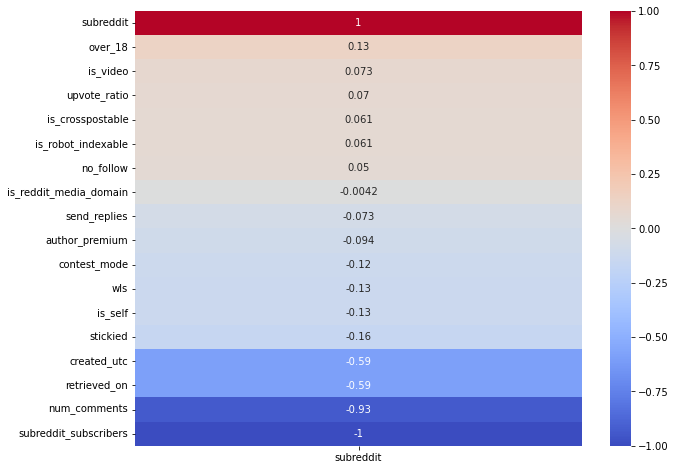

In [19]:
#Let's see the heat map without making dummies to see if we can reduce this further
#Based on Breakfast hour Thursday the 9th
plt.figure(figsize=(10,8))
sns.heatmap(df_nums.corr()[['subreddit']].sort_values(by='subreddit',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

Interestingly we see a negative correlation between num of comments and subreddit.

This indicates that the more comments there are, the more likely it is to be in the GenZ subreddit


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  2000 non-null   object 
 1   allow_live_comments            2000 non-null   bool   
 2   author                         2000 non-null   object 
 3   author_flair_background_color  210 non-null    object 
 4   author_flair_css_class         190 non-null    object 
 5   author_flair_richtext          2000 non-null   object 
 6   author_flair_template_id       800 non-null    object 
 7   author_flair_text              800 non-null    object 
 8   author_flair_text_color        800 non-null    object 
 9   author_flair_type              2000 non-null   object 
 10  author_fullname                2000 non-null   object 
 11  author_is_blocked              2000 non-null   bool   
 12  author_patreon_flair           2000 non-null   b

Let's deal with the title and the selftext to see if there is a difference between them in the 2 subreddits. We will start with title

We need it to be lower cased

In [21]:
df['title'] = df['title'].map(lambda x: x.lower())

In [22]:
X = df['title']
y = df['subreddit']

In [23]:
# Check what we need to check in a classification problem.
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

It is no surprise, but we can see that the baseline is 50%

In [24]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [25]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [26]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [27]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer()

In [28]:
# Transform the corpus.
X_train = cvec.transform(X_train)

In [29]:
X_train.shape

(1340, 879)

In [30]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
X_test = cvec.transform(X_test)

In [32]:
train_df = pd.DataFrame(X_train.todense(), columns = cvec.get_feature_names())

train_df.head()

,10,12,13,16,16th,17,18,1980,1985,1988,...,young,younger,your,yourself,zer,zers,zillenials,zoe,zoomers,zs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_df['title'] = y_train.values

<AxesSubplot:>

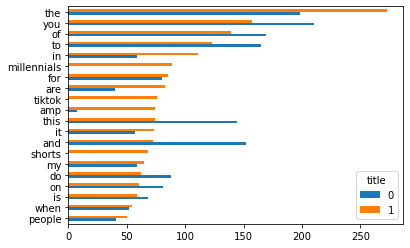

In [34]:
train_df.groupby('title').sum().T.sort_values(1, ascending = True).tail(20).plot.barh()

We see the words milennials, tiktok, shorts and amp favor the milennial subreddit.


In [35]:
#from this url https://stackoverflow.com/questions/33605946/attributeerror-lower-not-found-using-a-pipeline-with-a-countvectorizer-in-scik
def my_tokenizer(X):
    newlist = []
    for alist in X:
        newlist.append(alist[0].split(' '))
    return newlist

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [37]:
#Taken from 5.06
pipe = Pipeline([
    #('cvec', CountVectorizer(tokenizer=my_tokenizer)),
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [38]:
X_train.shape

(1340,)

In [39]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('nb', MultinomialNB())])

In [40]:
print('Train:', pipe.score(X_train, y_train))
print('Test:', pipe.score(X_test, y_test))

Train: 0.9828358208955223
Test: 0.9742424242424242


This indicates that out model is 97.4% accurate in predicting whether a title is in the millenial subreddit or the GenZ one.


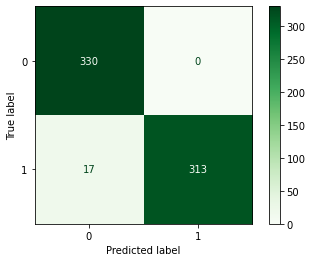

In [41]:
# Confusion matrix
plot_confusion_matrix(pipe, X_test, y_test, cmap='Greens')

It seems that out of 660 testing data, the model only predicted 17 entries incorrectly. Now that we did that for title, we will do it for selftext

In [42]:
df_selftext = df[['subreddit', 'selftext']].dropna()
X = df_selftext['selftext']
y = df_selftext['subreddit']

In [43]:
df_selftext.isnull().sum()

subreddit    0
selftext     0
dtype: int64

In [44]:
df_selftext.shape

(950, 2)

In [45]:
# Check what we need to check in a classification problem.
y.value_counts(normalize=True)

0    0.536842
1    0.463158
Name: subreddit, dtype: float64

The baseline is 53.7%

In [46]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [47]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [48]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [49]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer()

In [50]:
# Transform the corpus.
X_train = cvec.transform(X_train)

In [51]:
X_train.shape

(636, 1479)

In [52]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
X_test = cvec.transform(X_test)

In [54]:
train_df = pd.DataFrame(X_train.todense(), columns = cvec.get_feature_names())

train_df.head()

,000,06,10,100,11,12,13,14,15,16,...,your,yourself,youth,youtu,youtube,yr,z4mbxaa3xl8,zendaya,zillenials,zpomyri0w
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
train_df['title'] = y_train.values

<AxesSubplot:>

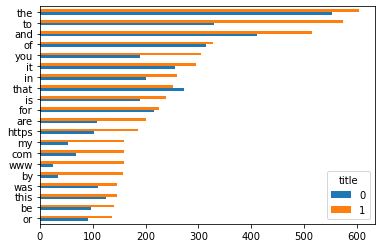

In [56]:
train_df.groupby('title').sum().T.sort_values(1, ascending = True).tail(20).plot.barh()

We see in the subtext that the words https, com, www, and watch are all more correlated with millenial than with GenZ. This indicates to me that people in the millenial subreddit are more likely to post links than in the GenZ subreddit.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
#Taken from 5.06
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [61]:
X_train.shape

(636,)

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('nb', MultinomialNB())])

In [63]:
print('Train:', pipe.score(X_train, y_train))
print('Test:', pipe.score(X_test, y_test))

Train: 0.809748427672956
Test: 0.8121019108280255


This shows that the model is 81.2% accurate in predicting the subreddit given subtext. It is slightly overfit. 

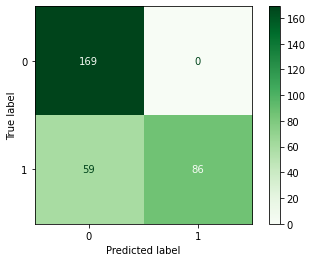

In [64]:
# Confusion matrix
plot_confusion_matrix(pipe, X_test, y_test, cmap='Greens')

This shows most of the problem comes when the model predicts for the GenZ subreddit and it is really in the millenial subreddit.

Now that we did this, let's look at a random forest and extra tree classifier for both the title column and the subtext column

In [65]:
X = df['title']
y = df['subreddit']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [67]:
#take from https://stackoverflow.com/questions/40913104/how-to-use-randomforestclassifier-with-string-data
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
clf = RandomForestClassifier()  
clf.fit(X_train, y_train) 

RandomForestClassifier()

In [68]:
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.9850746268656716

The random forest classifier gives us an accuracy rate of 98.5% in determining if a title is in the millenial subreddit or the GenZ subreddit.

In [69]:
X_test = vec.fit_transform(X_test)
clf.fit(X_test, y_test)

RandomForestClassifier()

In [70]:
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.9621212121212122

The random forest classifier gives us an accuracy rate of 96.2% for testing data in determining if a title is in the millenial subreddit or the GenZ subreddit

In [71]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(clf,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

0.982089552238806


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

In [72]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(clf,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_test, y_test)

print(gs.best_score_)

gs.best_params_

0.940909090909091


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

As we can see, Random forest fits the model quiet well

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [74]:
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
et = ExtraTreesClassifier()  
et.fit(X_train, y_train) 

ExtraTreesClassifier()

In [75]:
cross_val_score(et, X_train, y_train, cv = 5).mean()

0.9850746268656716

The extra trees classifier gives us an accuracy rate of 98.6% in determining if a title is in the millenial subreddit or the GenZ subreddit.

In [76]:
X_test = vec.fit_transform(X_test)
et.fit(X_test, y_test)

ExtraTreesClassifier()

In [77]:
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.959090909090909

The extra trees classifier gives us an accuracy rate of 96.5% for testing data in determining if a title is in the millenial subreddit or the GenZ subreddit

In [78]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(et,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

0.982089552238806


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

In [79]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(et,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_test, y_test)

print(gs.best_score_)

gs.best_params_

0.9530303030303031


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

As we can see, Extra Trees fits the model quiet well

Now let's try the same thing but with selftext

In [80]:
X = df_selftext['selftext']
y = df_selftext['subreddit']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [82]:
#take from https://stackoverflow.com/questions/40913104/how-to-use-randomforestclassifier-with-string-data
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
clf = RandomForestClassifier()  
clf.fit(X_train, y_train) 

RandomForestClassifier()

In [83]:
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.8097810039370079

The random forest classifier gives us an accuracy rate of 81% in determining if a selftext is in the millenial subreddit or the GenZ subreddit.

In [84]:
X_test = vec.fit_transform(X_test)
clf.fit(X_test, y_test)

RandomForestClassifier()

In [85]:
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.818484383000512

The random forest classifier gives us an accuracy rate of 81.8% in determining if a selftext is in the millenial subreddit or the GenZ subreddit.

In [86]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(clf,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

0.8097810039370079


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

In [87]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(clf,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_test, y_test)

print(gs.best_score_)

gs.best_params_

0.8121351766513056


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 150}

As we can see, Random forest fits the model quiet well

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [89]:
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
et = ExtraTreesClassifier()  
et.fit(X_train, y_train) 

ExtraTreesClassifier()

In [90]:
cross_val_score(et, X_train, y_train, cv = 5).mean()

0.8097810039370079

The random forest classifier gives us an accuracy rate of 81% in determining if a selftext is in the millenial subreddit or the GenZ subreddit.

In [91]:
X_test = vec.fit_transform(X_test)
et.fit(X_test, y_test)

ExtraTreesClassifier()

In [92]:
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.818484383000512

The extra trees classifier gives us an accuracy rate of 81.8% for testing data in determining if a selftext is in the millenial subreddit or the GenZ subreddit

In [93]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(et,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

0.8097810039370079


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

In [94]:
#From lesson 6.03
rf_reg_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

gs = GridSearchCV(et,
                 param_grid = rf_reg_params,
                 cv = 5,
                 n_jobs = -1)

gs.fit(X_test, y_test)

print(gs.best_score_)

gs.best_params_

0.8121351766513056


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}

As we can see, extra trees fits the model quiet well

Conclusion: Given a title, it is easy to create a model that can determine if the title is from the millenial subreddit or the GenZ subreddit. If given selftext, I recommend either the RandomForestClassifier or the ExtraTreesClassifier.

___